In [1]:
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN 
import csv
import os
import numpy as np
import json
from sklearn.manifold import TSNE

In [2]:
meta = None
with open('./scraped/metadata.json') as f:
    meta = json.load(f)

In [3]:
index2name = []
for m in meta:
    index2name.append(m.get('name'))

In [4]:
index2name[:5]

['Bitcoin', 'Ethereum', 'BNB', 'XRP', 'Cardano']

In [5]:
embed = []
for m in meta:
    feats = np.array([m.get('market_cap'), m.get('fully_diluted_market_cap'), m.get('circulating_supply'), m.get('total_supply')])
    embed.append(feats)
embed = np.array(embed)

In [6]:
embed

array([[8.53156332e+11, 8.53156332e+11, 1.89955000e+07, 1.89955000e+07],
       [3.82421302e+11, 3.82421302e+11, 1.20135312e+08, 1.20135312e+08],
       [6.90548205e+10, 6.90548205e+10, 1.65116761e+08, 1.65116761e+08],
       ...,
       [6.32231262e+07, 6.32231262e+07, 5.95248695e+08, 6.55932996e+08],
       [6.30349240e+07, 6.30349240e+07, 3.38541660e+07, 2.50000000e+08],
       [6.25803319e+07, 6.25803319e+07, 4.40859613e+16, 4.67758553e+16]])

In [7]:
tsne = TSNE(n_components=2).fit_transform(embed)

C:\Users\lij47\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lij47\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\lij47\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

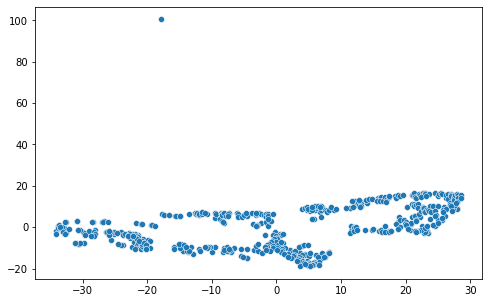

In [8]:
df_subset = {}
df_subset['x'] = tsne[:,0]
df_subset['y'] = tsne[:,1]
plt.figure(figsize=(8,5))
sns.scatterplot(df_subset['x'], df_subset['y'])

In [9]:
dbscan = DBSCAN(eps=3, min_samples=2).fit(tsne)
dbscan.labels_

array([ 0,  0,  0,  1,  2,  0,  0,  0,  0,  1,  2,  2,  3,  2,  0,  1,  2,
        0,  0,  0,  0,  0,  0,  1,  0,  2,  0,  1,  1,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  3,  0,  1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  4,  1,  1,
        4,  1,  5,  1,  1,  5,  5,  5,  4,  5,  5,  4,  5,  1,  5,  5,  1,
        4,  4,  1,  5,  5,  4,  5,  4,  5,  4,  5,  1,  5,  4,  5,  5,  1,
        5,  4,  5,  4,  4,  5,  1,  4,  4,  4,  4,  5,  5,  5,  5,  1,  3,
        4,  1,  4,  3,  4,  1,  5,  4,  5,  1,  5,  4,  4,  4,  1,  4,  5,
        5,  1,  4,  1,  5,  5,  4,  5,  5,  5,  4,  5,  4,  1,  4,  5,  4,
        4,  5,  1,  1,  4,  5,  5,  5,  4,  4,  4,  4,  5,  5,  4,  1,  4,
        4,  5,  1,  4,  4,  5,  5,  1,  1,  4,  5,  1,  1,  0,  1,  0,  0,
        4,  0,  1,  0,  0,  5,  5,  1,  1,  4,  5,  1,  5,  4,  4,  5,  5,
        4,  5,  4,  5,  4

In [10]:
tsne_label = np.hstack((tsne, dbscan.labels_[:, np.newaxis]))

C:\Users\lij47\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lij47\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lij47\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lij47\anacond

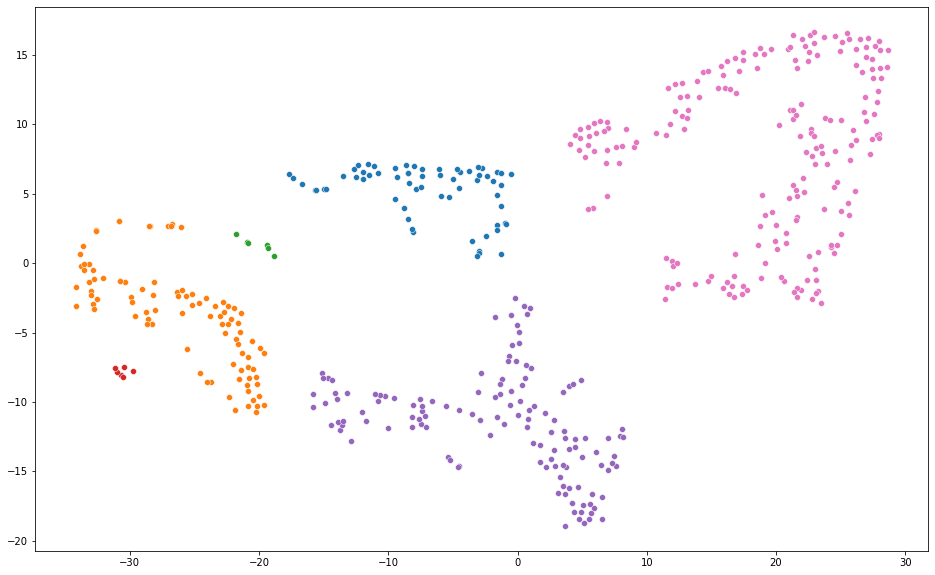

In [11]:
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink']

plt.figure(figsize=(16,10))
for i in range(6):
    data = tsne_label[tsne_label[:, 2] == i]
    sns.scatterplot(data[:, 0], data[:, 1], color=COLORS[i])
plt.savefig("dbscan.jpg", dpi=500)# 

In [15]:
meta_cat = []
for m, y in zip(meta, dbscan.labels_):
    meta_cat.append({
        'name': m.get('name'),
        'symbol': m.get('symbol'),
        'meta': int(y)
    })

In [17]:
with open('./scraped/dbscan_categories.json', 'w') as f:
    json.dump(meta_cat, f, indent=4)